#Business Understanding

**PROBLEM :**  
How to distinguish between a real news and a fake news?  
**SOLUTION :**   
We can show an algorithm that has a large number of false and real news stories to learn to distinguish between them automatically, and then give a possible score or percentage of confidence such as a given news release is true or false.

#Data Understanding

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# countvector transform words to number (assignes each word a number i.e. it's frequency )
from sklearn.feature_extraction.text import CountVectorizer
# TfidfTransformer used to remove stop words in countvector (i.e the words that adds frequecy but don't actually bring any features eg- 'are', 'the') 
from sklearn.feature_extraction.text import TfidfTransformer
# using pipeline here to (countvector + tfidftransform) and then apply moodle
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
# importing models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [2]:
# mounting drive to extract csv data files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading CSV files

In [3]:
true = pd.read_csv("/content/drive/MyDrive/GEU stuff/mini proj/fake news v2/True.csv") 
fake = pd.read_csv("/content/drive/MyDrive/GEU stuff/mini proj/fake news v2/Fake.csv")

## Specifying fake and real

In [4]:
fake['target'] = 'fake'
true['target'] = 'true'
#News dataset
news = pd.concat([fake, true]).reset_index(drop = True) #.reset_index(drop = True) will delete the index instead of inserting it back into the columns of the DataFrame
# i.e the current index will be deleted entirely and the numeric index will replace it.
news.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


#Data Processing

##Train-test split

In [5]:
# spliting data in 80-20
x_train,x_test,y_train,y_test = train_test_split(news['text'], news.target, test_size=0.2, random_state=1)

#Modelling

In [6]:
# funciton to plot confusion matrix graphically
def plot_cm(cm):
  new_cm = pd.DataFrame(cm , index = ['Fake','Not Fake'] , columns = ['Fake','Not Fake'])
  sns.heatmap(new_cm,cmap= 'Greens', annot = True, fmt='',xticklabels = ['Fake','Not Fake'], yticklabels = ['Fake','Not Fake']) #annot = true makes text(values) to be written on each cell
  plt.xlabel("Actual")
  plt.ylabel("Predicted")
  plt.title('Confusion matrix On Test Data')
  plt.show()

##Logistic regression classification

In [7]:
# https://towardsdatascience.com/how-is-logistic-regression-used-as-a-classification-algorithm-51eaf0d01a78
# ^ how LR do classification despite beging R

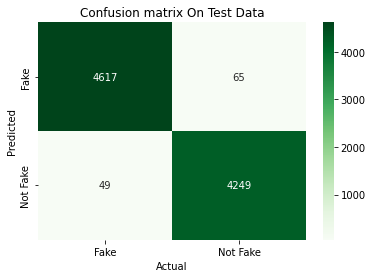

In [8]:
pipe1 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', LogisticRegression())])
model_lr = pipe1.fit(x_train, y_train)
lr_pred = model_lr.predict(x_test)
cm_lr = confusion_matrix(y_test, lr_pred)
plot_cm(cm_lr)

##Support Vector classification

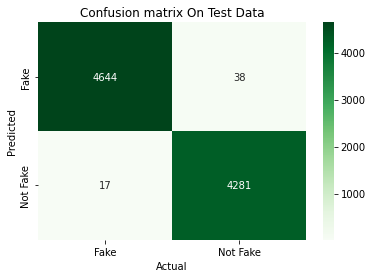

In [9]:
pipe2 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', LinearSVC())])
model_svc = pipe2.fit(x_train, y_train)
svc_pred = model_svc.predict(x_test)
cm_svm = confusion_matrix(y_test, svc_pred)
plot_cm(cm_svm)

##Naive-Bayes classification

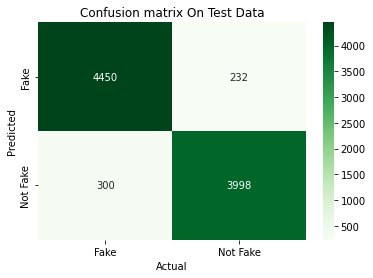

In [10]:
pipe3 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', MultinomialNB())])
model_nb = pipe3.fit(x_train, y_train)
nb_pred = model_nb.predict(x_test)
cm_nb = confusion_matrix(y_test, nb_pred)
plot_cm(cm_nb)

#Evaluation

##Comparision b/w LR-SVM-mb

In [14]:
#LR
print("Accuracy of Logistic Regression Classifier: {}%".format(round(accuracy_score(y_test, lr_pred)*100,2))) # .format = insert value up to 2 decimal place replacing {}% in string
#SVM
print("Accuracy of SVM Classifier: {}%".format(round(accuracy_score(y_test, svc_pred)*100,2)))
# NB
print("Accuracy of Naive Bayes Classifier: {}%".format(round(accuracy_score(y_test, nb_pred)*100,2)))

Accuracy of Logistic Regression Classifier: 98.73%
Accuracy of SVM Classifier: 99.39%
Accuracy of Naive Bayes Classifier: 94.08%


**Grpahical representaion**

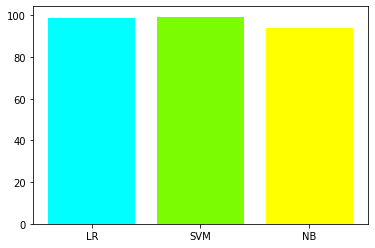

In [15]:
a=round(accuracy_score(y_test, lr_pred)*100,2)
b=round(accuracy_score(y_test, svc_pred)*100,2)
c=round(accuracy_score(y_test, nb_pred)*100,2)
df=[a,b,c] # y-axis
moodlE = ['LR', 'SVM', 'NB'] # x-axix
plt.bar(moodlE,df,color=['cyan', 'lawngreen', 'yellow'])
plt.show()

#Deployment